# -1) imports

In [1]:
import base64

from google.cloud                         import aiplatform
from google.cloud.aiplatform.gapic.schema import predict


# 0) local functions

In [2]:

def predict_image_classification_sample(
    project: str,
    endpoint_id: str,
    filename: str,
    location: str = "us-central1",
    api_endpoint: str = "us-central1-aiplatform.googleapis.com",
):
    # The AI Platform services require regional API endpoints.
    client_options = {"api_endpoint": api_endpoint}
    # Initialize client that will be used to create and send requests.
    # This client only needs to be created once, and can be reused for multiple requests.
    client = aiplatform.gapic.PredictionServiceClient(client_options=client_options)
    with open(filename, "rb") as f:
        file_content = f.read()

    # The format of each instance should conform to the deployed model's prediction input schema.
    encoded_content = base64.b64encode(file_content).decode("utf-8")
    instance = predict.instance.ImageClassificationPredictionInstance(
        content=encoded_content,
    ).to_value()
    instances = [instance]
    # See gs://google-cloud-aiplatform/schema/predict/params/image_classification_1.0.0.yaml for the format of the parameters.
    parameters = predict.params.ImageClassificationPredictionParams(
        confidence_threshold=0.5, max_predictions=5,
    ).to_value()
    endpoint = client.endpoint_path(
        project=project, location=location, endpoint=endpoint_id
    )
    response = client.predict(
        endpoint=endpoint, instances=instances, parameters=parameters
    )
    print("response")
    print(" deployed_model_id:", response.deployed_model_id)
    # See gs://google-cloud-aiplatform/schema/predict/prediction/image_classification_1.0.0.yaml for the format of the predictions.
    predictions = response.predictions
    for prediction in predictions:
        print(" prediction:", dict(prediction))


# 1) parameters

In [3]:
params = {
    "project"     : "helical-sanctum-353821" ,
    "endpoint_id" : "400917123859218432"     ,
    "filename"    : "./odesquess.jpeg",
    "location"    : "us-central1",
}

# 2) prediction of a local file

In [4]:
predict_image_classification_sample(**params)

response
 deployed_model_id: 7946746678030106624
 prediction: {'ids': ['6268098636404490240'], 'confidences': [0.946619809], 'displayNames': ['homme']}


# 3) test on other files

In [5]:
from   google.cloud             import storage
client       = storage.Client()
BUCKET_NAME = "prediction_input_for_cloud_orbit"
bucket      = client.bucket(BUCKET_NAME)

In [6]:
bucket_content = [blob.name for blob in bucket.list_blobs()]

In [7]:
jpeg_files = [filename for filename in bucket_content if filename.endswith(".jpeg")]
jpeg_files

['ameilia.jpeg',
 'girgio.jpeg',
 'guido.jpeg',
 'ines_kour.jpeg',
 'odesquess.jpeg',
 'victo.jpeg']

In [8]:
list(map(lambda blob: bucket.blob(blob.name).download_to_filename(blob.name) , bucket.list_blobs()))

[None, None, None, None, None, None, None]

In [9]:
from IPython.display import display, Image

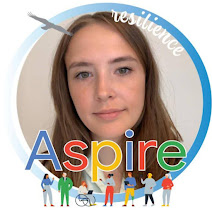

response
 deployed_model_id: 7946746678030106624
 prediction: {'confidences': [0.968854845], 'displayNames': ['femme'], 'ids': ['1642338869141569536']}


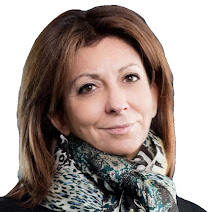

response
 deployed_model_id: 7946746678030106624
 prediction: {'displayNames': ['femme'], 'confidences': [0.999768436], 'ids': ['1642338869141569536']}


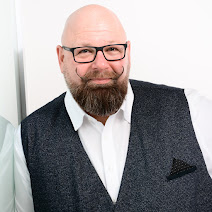

response
 deployed_model_id: 7946746678030106624
 prediction: {'ids': ['6268098636404490240'], 'confidences': [0.991054237], 'displayNames': ['homme']}


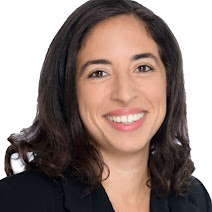

response
 deployed_model_id: 7946746678030106624
 prediction: {'ids': ['1642338869141569536'], 'confidences': [0.999995112], 'displayNames': ['femme']}


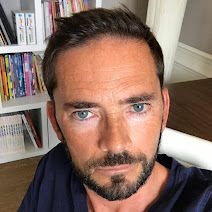

response
 deployed_model_id: 7946746678030106624
 prediction: {'ids': ['6268098636404490240'], 'confidences': [0.946619809], 'displayNames': ['homme']}


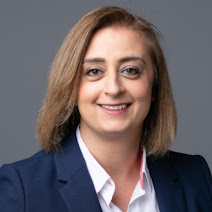

response
 deployed_model_id: 7946746678030106624
 prediction: {'ids': ['1642338869141569536'], 'confidences': [0.999782741], 'displayNames': ['femme']}


In [10]:

for input_name in jpeg_files:
    display(Image(filename=input_name))
    bucket.blob(input_name).download_to_filename(input_name)
    params["filename"] = input_name
    predict_image_classification_sample(**params)

# Annexes

In [11]:
image_urls = [
    "https://static.remove.bg/remove-bg-web/f68d607e3305b1c23820eab456f9a63968772cfc/assets/start-1abfb4fe2980eabfbbaaa4365a0692539f7cd2725f324f904565a9a744f8e214.jpg", 
"http://staffmobility.eu/sites/default/files/isewtweetbg.jpg",
    "https://images.freejpg.com.ar/900/2205/hockey-goalkeeper-F100031448.jpg",
    "https://www.sante-sur-le-net.com/wp-content/uploads/2017/03/transpiration-homme-femme.jpg"
]

In [12]:
def download_url(url):
    img_data   = requests.get(image_url).content
    image_name = image_url.split("/")[-1]
    with open(image_name, 'wb') as handler:
        handler.write(img_data)
    return image_name

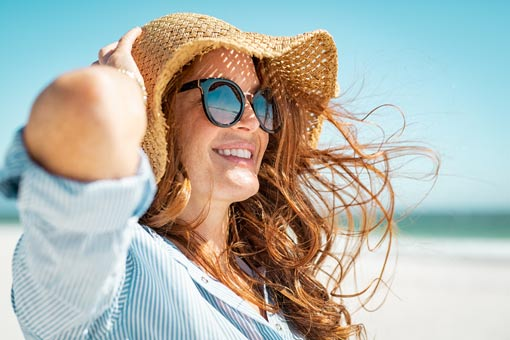

response
 deployed_model_id: 7946746678030106624
 prediction: {'confidences': [0.989033461], 'ids': ['1642338869141569536'], 'displayNames': ['femme']}


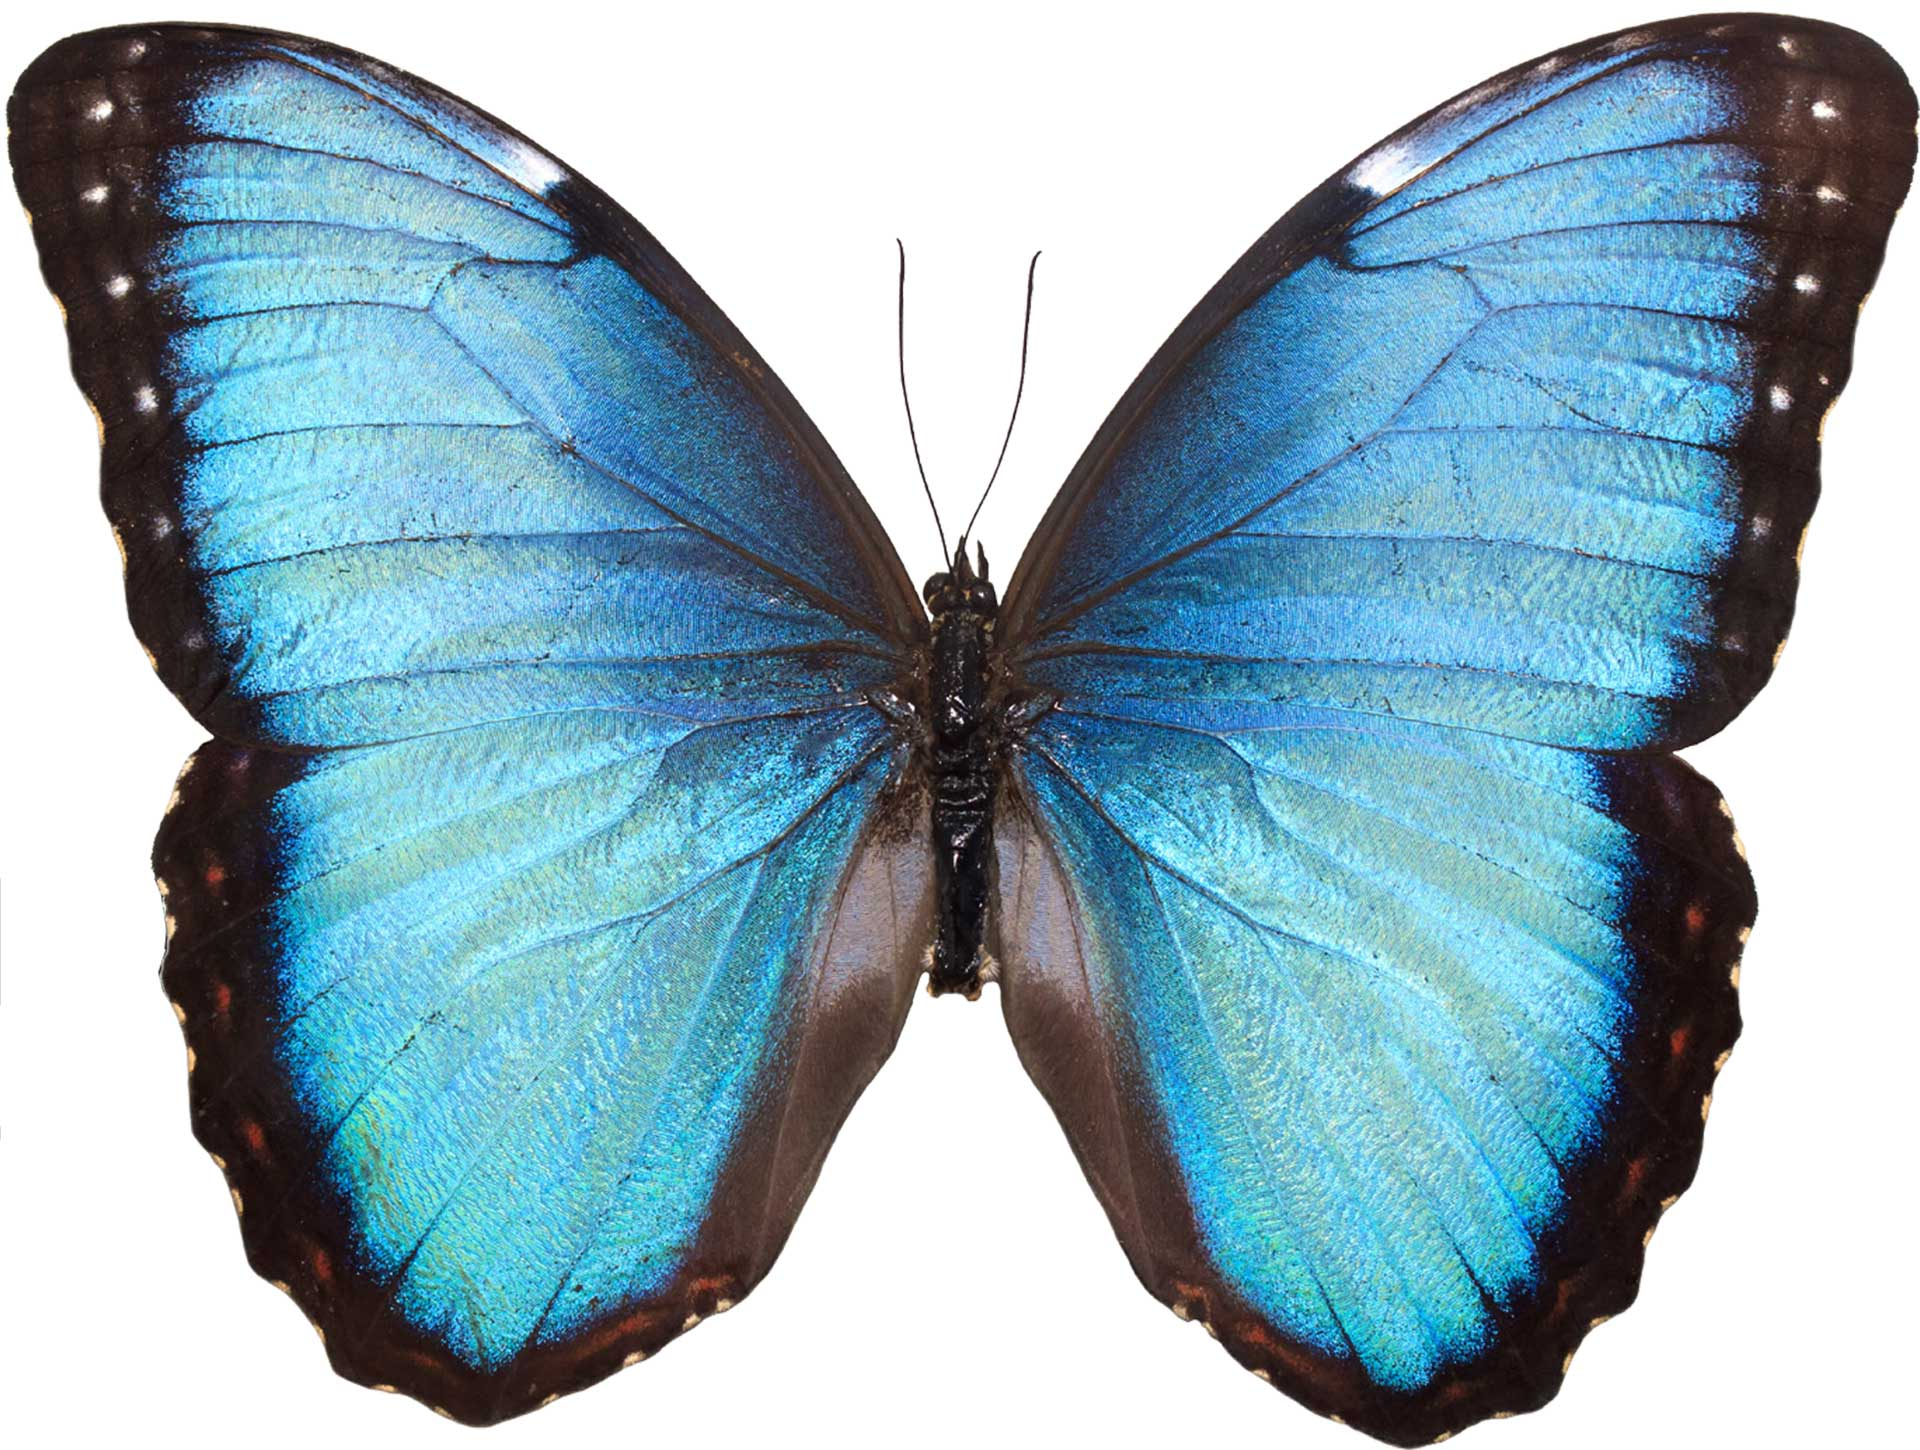

response
 deployed_model_id: 7946746678030106624
 prediction: {'displayNames': ['homme'], 'ids': ['6268098636404490240'], 'confidences': [0.943248928]}


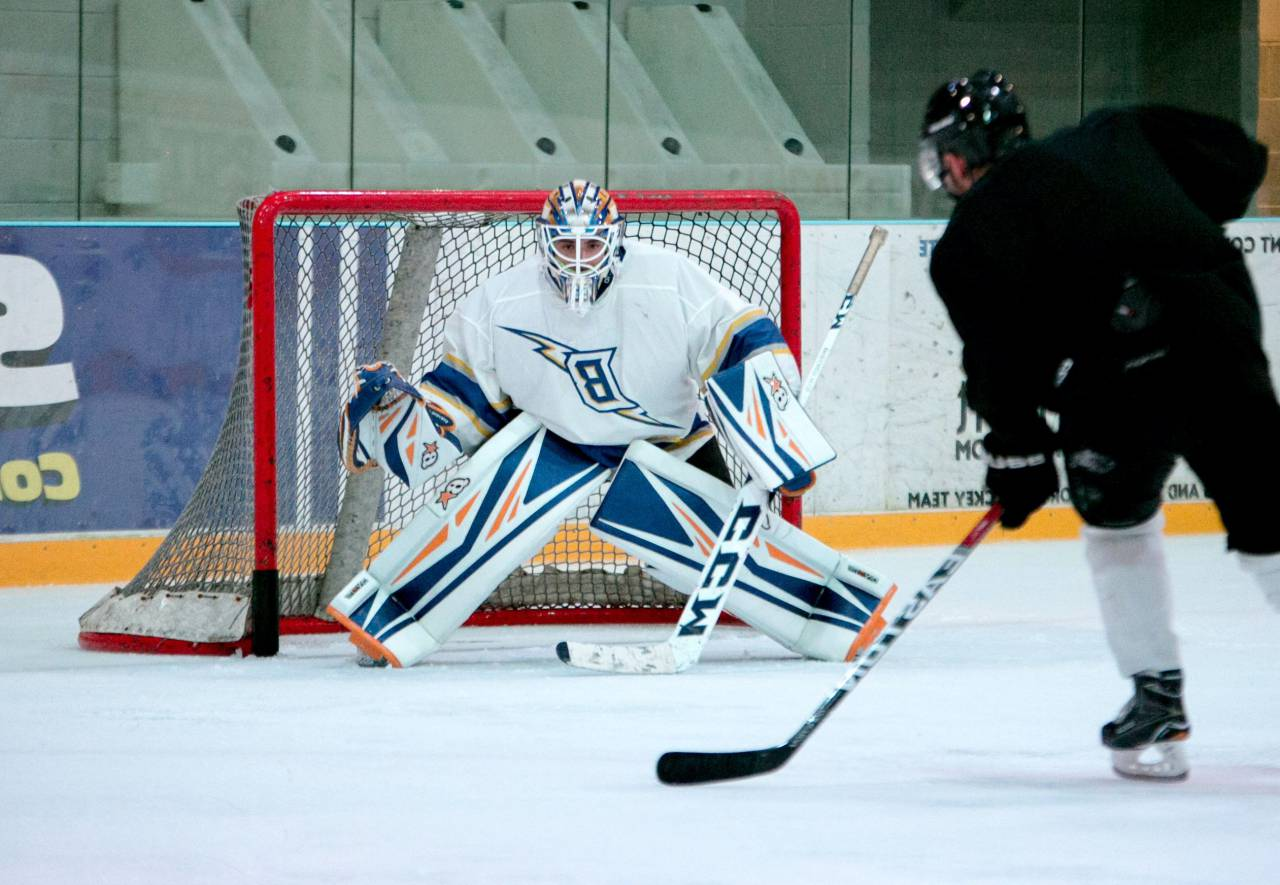

response
 deployed_model_id: 7946746678030106624
 prediction: {'confidences': [0.761203647], 'displayNames': ['homme'], 'ids': ['6268098636404490240']}


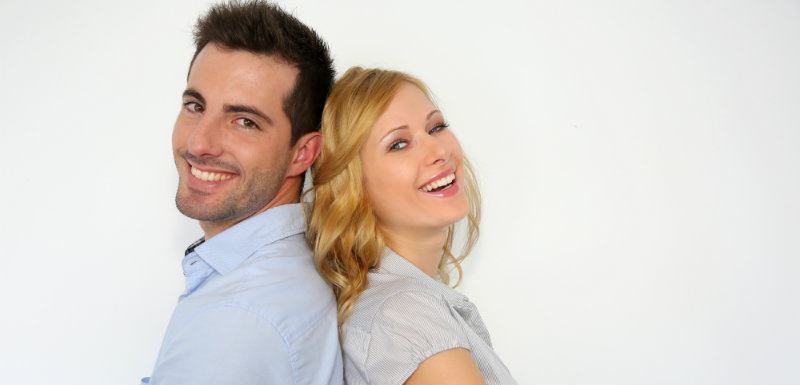

response
 deployed_model_id: 7946746678030106624
 prediction: {'displayNames': ['femme'], 'confidences': [0.910185754], 'ids': ['1642338869141569536']}


In [13]:
import requests

for image_url in image_urls:
    image_name = download_url(image_url)
    display(Image(filename=image_name))
    params["filename"] = image_name
    predict_image_classification_sample(**params)